In [5]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader
from torchvision import transforms

import matplotlib.pyplot as plt

from dataset import Dataset
from tools import getDataset, print_class_distribution

import numpy as np

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    print("MPS device not found.")
print('Device:', device)

Device: mps


In [7]:
from sklearn.model_selection import train_test_split
from PIL import Image


root_dir = os.path.join(os.getcwd(), 'datasets/miniImageNet')
dataset, label_mapping = getDataset(root_dir, shuffle_images=True, num_classes=60)

train_dataset, temp_dataset = train_test_split(dataset, test_size=0.4, random_state=42)
val_dataset, test_dataset = train_test_split(temp_dataset, test_size=0.5, random_state=42)

train_transforms = transforms.Compose([
            # transforms.Resize((self.imsize, self.imsize), Image.LANCZOS),
            transforms.RandomCrop(84, padding=8),
            transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.3891, 0.3891, 0.3891), (0.2877, 0.2877, 0.2877)),
        ])

train_dataset = Dataset(dataset=train_dataset, path=root_dir, phase='train', shuffle_images=True, transform=None)
val_dataset = Dataset(dataset=val_dataset, path=root_dir, phase='val', shuffle_images=True, transform=None)
test_dataset = Dataset(dataset=test_dataset, path=root_dir, phase='test', shuffle_images=True, transform=None)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)

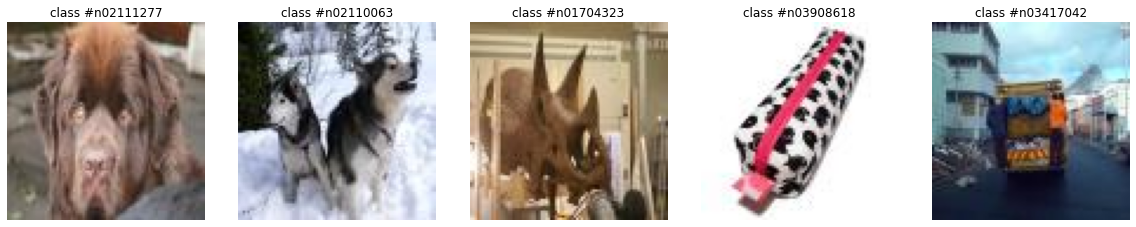

total number of training set: 21240


<BarContainer object of 59 artists>

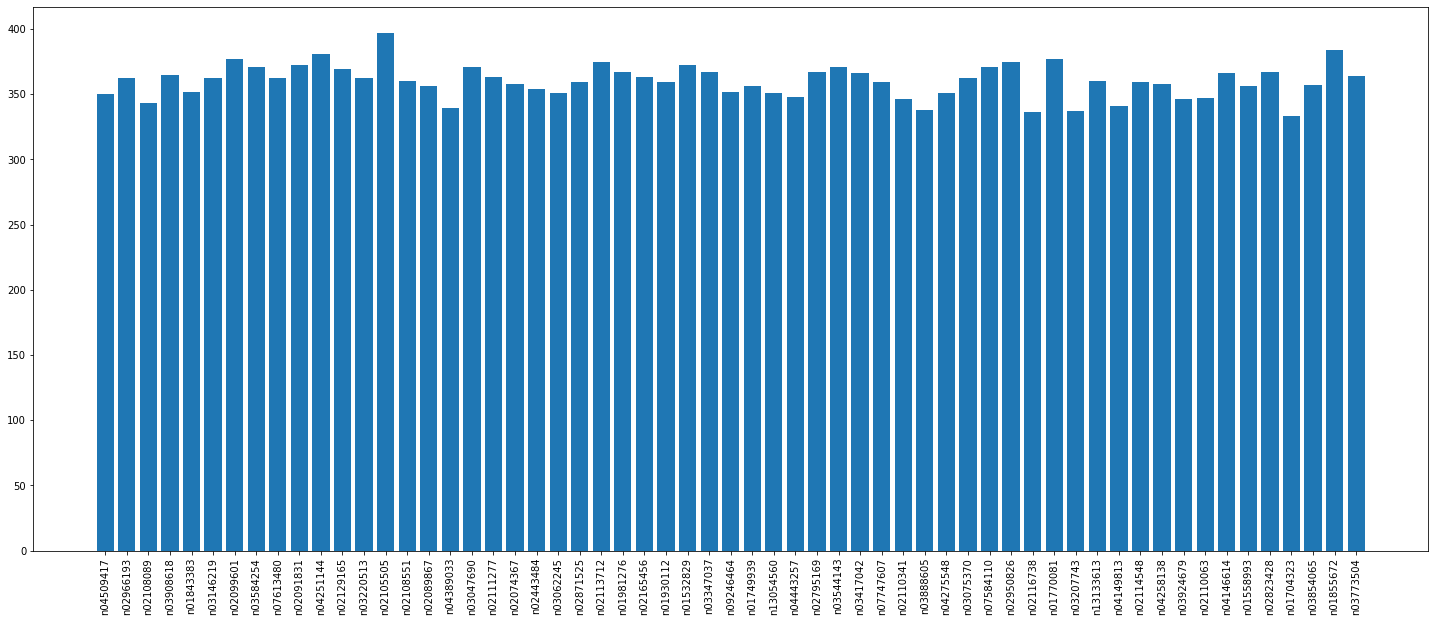

In [23]:
idx = np.random.choice(range(len(train_dataset)), 5, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = train_dataset[idx[i]]
    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_mapping[label]))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of training set: {}'.format(len(train_dataset)))
dist = {}
for i in label_mapping.keys():
    # print('numer of images for class {}: {}'.format(label_mapping[i], len([label for _, label in train_dataset.data if label == i])))
    dist[label_mapping[i]] = (len([label for _, label in train_dataset.data if label == i]))

names = list(dist.keys())
values = list(dist.values())
fig = plt.figure(figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.bar(range(len(dist)), values, tick_label=names)


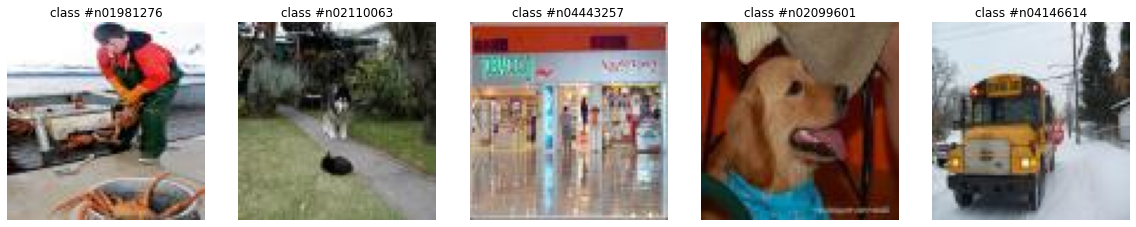

total number of validation set: 7080


<BarContainer object of 59 artists>

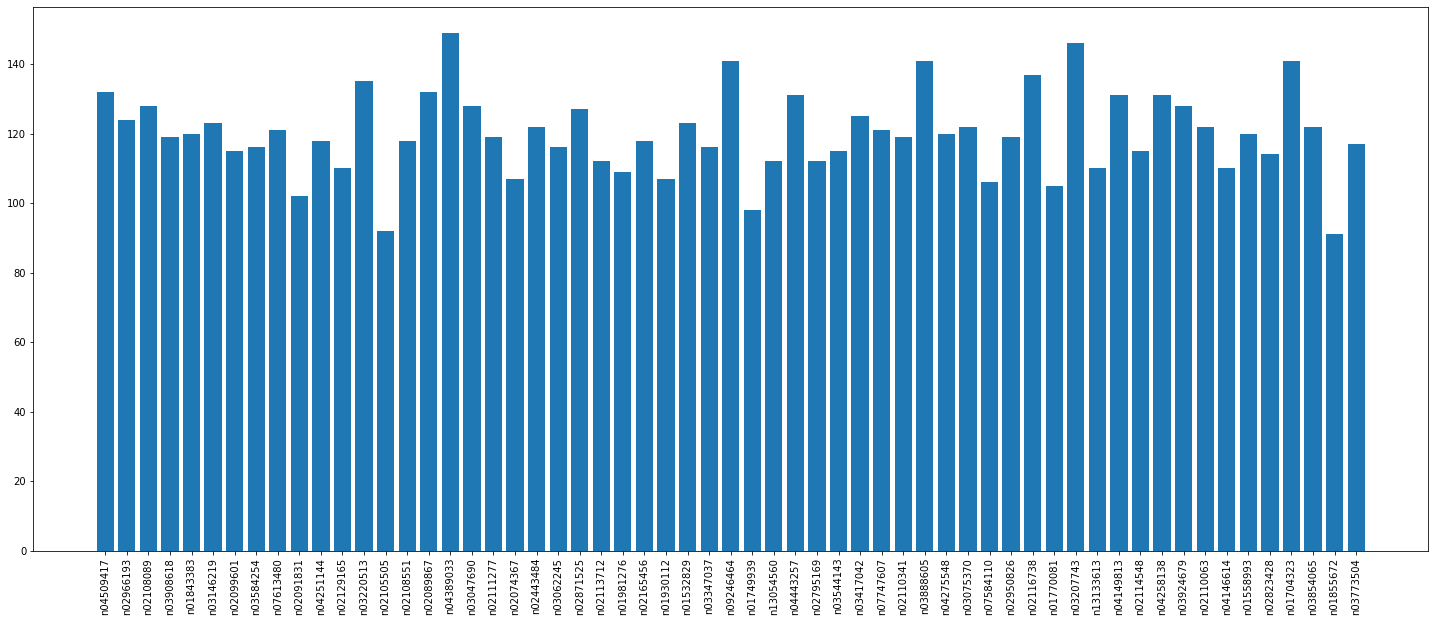

In [24]:
idx = np.random.choice(range(len(val_dataset)), 5, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = val_dataset[idx[i]]
    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_mapping[label]))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of validation set: {}'.format(len(val_dataset)))
dist = {}
for i in label_mapping.keys():
    # print('numer of images for class {}: {}'.format(label_mapping[i], len([label for _, label in val_dataset.data if label == i])))
    dist[label_mapping[i]] = (len([label for _, label in val_dataset.data if label == i]))

names = list(dist.keys())
values = list(dist.values())
fig = plt.figure(figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.bar(range(len(dist)), values, tick_label=names)

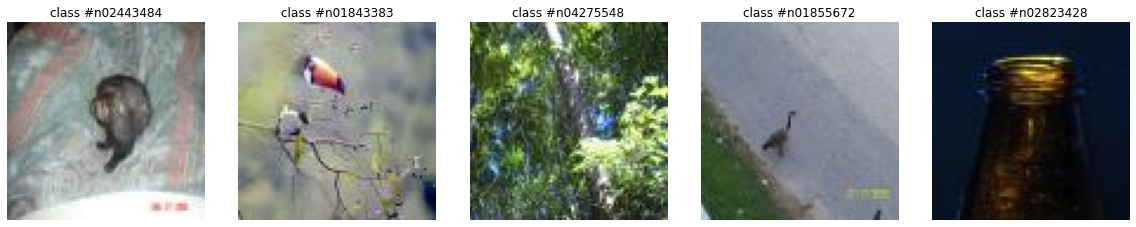

total number of validation set: 7080


<BarContainer object of 59 artists>

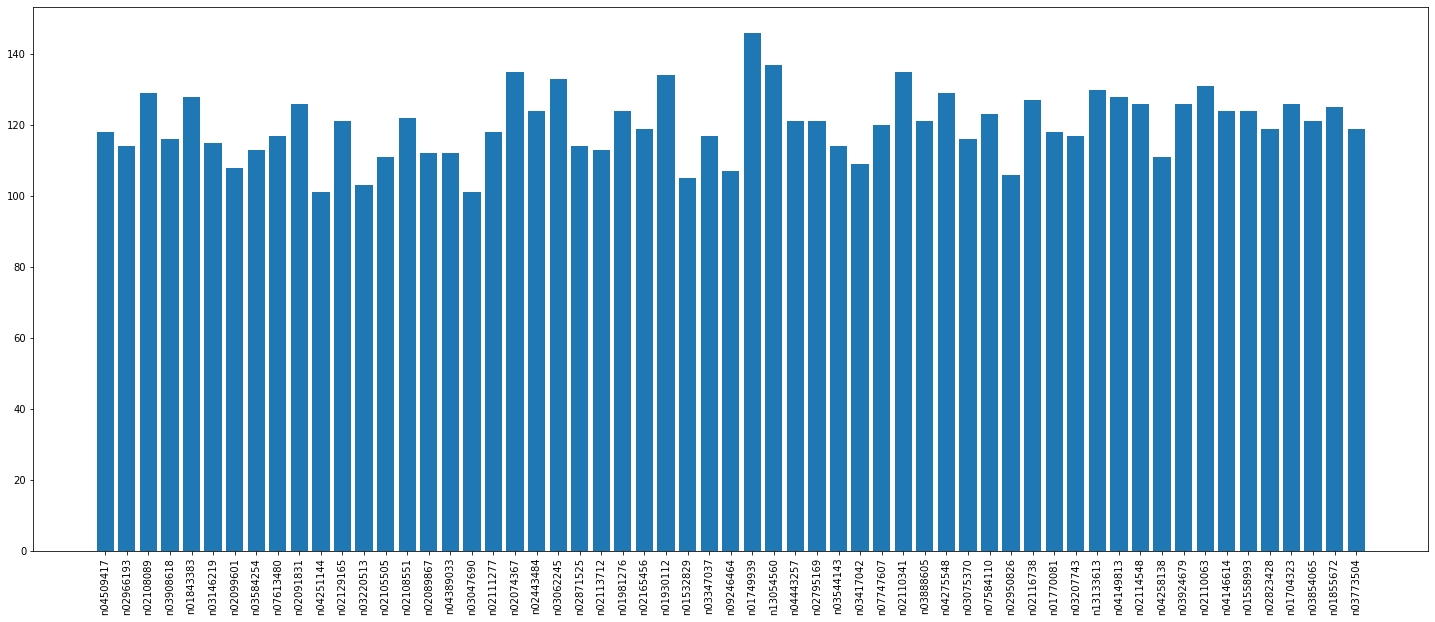

In [25]:
idx = np.random.choice(range(len(test_dataset)), 5, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = test_dataset[idx[i]]
    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_mapping[label]))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of validation set: {}'.format(len(test_dataset)))
dist = {}
for i in label_mapping.keys():
    # print('numer of images for class {}: {}'.format(label_mapping[i], len([label for _, label in test_dataset.data if label == i])))
    dist[label_mapping[i]] = (len([label for _, label in test_dataset.data if label == i]))

names = list(dist.keys())
values = list(dist.values())
fig = plt.figure(figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.bar(range(len(dist)), values, tick_label=names)